- https://www.kaggle.com/code/guosue/top-1-bike-sharing-detailed-eda-xgboost#Missing-values

In [61]:
import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# Summary from EDA:

- The bike rental count is generally lower on weekends, which may be due to less demand for transportation during leisure time. There are also fewer outliers during this time, indicating a more consistent demand.
- The spring season has a relatively lower bike rental count, which could be attributed to unpredictable weather or other seasonal factors. The average bike demand during the winter season is slightly lower than the summer and fall seasons, which may be due to the inclement weather and holidays causing people to travel less.
- The median value of bike rentals by hour of the day is relatively high during the hours of 7AM-8AM and 5PM-6PM, which can be attributed to regular commuters for school and work.
- The pattern of registered bike rentals by hour of the day is similar to that of all bike rentals, but most of the outliers in the count plot are from non-registered users, which could be from tourists or occasional riders. The peak rental count around 7AM-8AM and 5PM-6PM is primarily from registered users, as people with regular commute times tend to be registered users. This indicates a strong correlation between registered users and regular commuter patterns.


weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fo
- Horrible weather like weather 4 mainly happened in Spring season which supports our previous assumption that weather conditions play a major role in leading less bike rental demand during spring season.
- It is observed that many people, regardless of their registration status, tend to rent bicycles between 10AM and 4PM. This trend is likely due to the fact that people are more likely to use bicycles for leisure activities during this time of the day.
- Furthermore, it is also found that most un-registered users tend to rent bicycles around 10am-3pm on weekends. This could be because casual users may use other forms of transportation to go to work/school during the weekdays and only rent bicycles during weekends for recreational activities.
- On weekdays, the peak rental count around 7AM-8AM and 5PM-6PM is primarily contributed by registered users. As previously mentioned, this can be attributed to regular school and office commuters who rely on bicycles as their primary mode of transportation during these times.
- The count pattern between casual and registered users are really different so it's better to use two models to predict them seperately and then sum up the prediction.

일반적인 분석   

- 일반적으로 자전거 대여 횟수는 주말에 더 적으며, 이는 여가 시간 동안 교통 수단에 대한 수요가 적기 때문일 수 있습니다. 또한 이 시간 동안 이상치가 적게 나타나 더 일관된 수요를 나타냅니다.
- 봄 시즌에는 자전거 대여 횟수가 상대적으로 적으며, 이는 예측할 수 없는 날씨나 다른 계절적 요인에 기인할 수 있습니다. 겨울 동안의 평균 자전거 수요는 여름과 가을 시즌보다 약간 낮으며, 이것은 궂은 날씨와 휴일로 인해 사람들이 여행을 적게 하기 때문일 수 있습니다.
- 하루 중 시간대별 자전거 대여의 중간값은 오전 7시-8시와 오후 5시-6시에 비교적 높은 편인데, 이는 학교와 직장을 위한 일반 통근자의 영향이라고 볼 수 있습니다.
- 하루 중 시간대별로 등록된 자전거 대여 패턴은 모든 자전거 대여 패턴과 유사하지만 카운트 플롯의 대부분의 이상치는 등록되지 않은 사용자의 것이며, 이는 관광객 또는 가끔 탑승하는 사람의 것일 수 있습니다. 오전 7시-8시와 오후 5시-6시경 최대 대여 인원은 주로 등록된 사용자이며, 출근 시간이 규칙적인 사용자인 경우가 많기 때문입니다. 이는 등록된 사용자와 일반 통근자 패턴 간의 상관 관계가 강하다는 것을 나타냅니다.

날씨 관련 분석    

- 날씨 4와 같은 끔찍한 날씨는 주로 봄 시즌에 발생했는데, 이는 날씨 조건이 봄 시즌 동안 자전거 대여 수요를 줄이는 데 주요한 역할을 한다는 우리의 이전 가정을 뒷받침합니다.
- 많은 사람들이 등록 여부와 상관없이 오전 10시에서 오후 4시 사이에 자전거를 빌리는 경향이 있는 것으로 관찰됩니다. 이 추세는 사람들이 하루 중 이 시간 동안 여가 활동을 위해 자전거를 사용할 가능성이 더 높기 때문일 것입니다.
- 게다가, 대부분의 미등록 사용자들은 주말에 오전 10시에서 오후 3시경에 자전거를 빌리는 경향이 있는 것으로 나타났습니다. 이것은 일상적인 사용자들이 평일에는 다른 형태의 교통수단을 이용하여 출근/학교에 가고 주말에는 레크리에이션 활동을 위해 자전거만 빌릴 수 있기 때문입니다.
- 평일에는 오전 7시-8시, 오후 5시-6시경 최대 대여 인원이 주로 등록된 이용자들에 의해 기부됩니다. 앞서 언급한 바와 같이, 이것은 일반 학교와 직장 통근자들이 이 시기 동안 그들의 주요 교통 수단으로 자전거에 의존하기 때문이라고 할 수 있습니다.
- 캐쥬얼 사용자와 등록 사용자 간의 카운트 패턴이 정말 다르기 때문에 두 가지 모델을 사용하여 개별적으로 예측한 후 예측을 합산하는 것이 좋습니다.

## About Dataset

- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

# Global Variables

In [2]:
import easydict
import json
args = easydict.EasyDict()

# path
args.default_path = '/content/data/MyDrive/google_lecture/05. machine learning/Projects/kaggle/bike_sharing_demand/data/'
args.train_path = args.default_path+'train.csv'
args.test_path = args.default_path+'test.csv'

args.submission_path = args.default_path+'sampleSubmission.csv'
args.submission_file = 'Submission_samples_{0:.5f}.csv'

args.SEED = 42
args.target = 'count'
args.numeric_cols = ['temp', 'atemp','humidity', 'windspeed']
args.category_cols = ['season', 'holiday', 'weather']

args.result_list = []

In [3]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


# Load Data

In [4]:
train = pd.read_csv(args.train_path)

print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
test = pd.read_csv(args.test_path)

print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


# Parse Datetime

In [6]:
def parse_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    # df['time'] = df.datetime.dt.strftime('%H:%M:%S')
    #
    df['week'] = df['datetime'].dt.isocalendar().week
    df['weekday'] = df['datetime'].dt.dayofweek

In [7]:
parse_datetime(train)
parse_datetime(test)

train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,52,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,52,5


# Missing values

In [8]:
def missing (df):
    """
    calculate % missing value for each column
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['missNum', 'missPercent'])
    return missing_values

In [9]:
missing(train)

,missNum,missPercent
datetime,0,0.0
season,0,0.0
week,0,0.0
hour,0,0.0
day,0,0.0
month,0,0.0
year,0,0.0
count,0,0.0
registered,0,0.0
casual,0,0.0


## Detect special missing value like 0

In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,weekday
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,25.917784,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,15.017269,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,1.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,14.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,26.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,40.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,52.0,6.000000


In [11]:
for feature in train[args.category_cols]:
        print(f'{feature}: {train[feature].unique()}')

season: [1 2 3 4]
holiday: [0 1]
weather: [1 2 3 4]


In [12]:
def find_index(data_col, val):
    """
    Query the index of the first occurrence of a value in a column, or -1 if none
    """
    val_list = [val]
    if data_col.isin(val_list).sum() == 0:
        index = -1
    else:
        index = data_col.isin(val_list).idxmax()
    return index

In [13]:
for col in args.numeric_cols:
    print(find_index(train[col], " "))

-1
-1
-1
-1


In [14]:
is_0 = []
for col in args.numeric_cols:
    is_0.append(find_index(train[col], 0))

missing_check_0 = pd.DataFrame({'cols': args.numeric_cols, 'is_0': is_0})
missing_check_0

,cols,is_0
0,temp,-1
1,atemp,-1
2,humidity,1091
3,windspeed,0


In [15]:
def zero_missing_percent(data, miss_col):
    miss_num = train[train[miss_col]==0].shape[0]
    miss_pct = round(miss_num/train.shape[0],4)
    print(f"There are {miss_num} missing values in {miss_col} column so missing percentage is {miss_pct}")

In [16]:
zero_missing_percent(train, 'windspeed')

There are 1313 missing values in windspeed column so missing percentage is 0.1206


In [17]:
zero_missing_percent(train, 'humidity')

There are 22 missing values in humidity column so missing percentage is 0.002


In [18]:
from sklearn.ensemble import RandomForestClassifier

def wind_0_fill(df):
    wind_0 = df[df['windspeed']==0]
    wind_not0 = df[df['windspeed']!=0]
    y_label = wind_not0['windspeed']

    rfc = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
    windcolunms = ['season', 'weather', 'temp', 'atemp', 'humidity', 'hour', 'month']
    rfc.fit(wind_not0[windcolunms], y_label.astype('int'))

    pred_y = rfc.predict(wind_0[windcolunms])
    wind_0['windspeed'] = pred_y
    df_rfw = wind_not0.append(wind_0)
    df_rfw.reset_index(inplace=True)
    return df_rfw

In [19]:
train = wind_0_fill(train)
test = wind_0_fill(test)

<ipython-input-18-b20f1d57bde2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rfw = wind_not0.append(wind_0)
<ipython-input-18-b20f1d57bde2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rfw = wind_not0.append(wind_0)


In [20]:
zero_missing_percent(train, 'windspeed')

There are 0 missing values in windspeed column so missing percentage is 0.0


# outliers

In [21]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [22]:
def detect_outliers_3sigma(data):
    # calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)

    # define the cutoff for what constitutes an outlier
    cutoff = 3 * std

    # boxplot
    sn.boxplot(x=data, orient="v")
    plt.show()

    # print lower, upper boundry
    lower, upper = mean-3*std, mean+3*std
    print(f"The lower/upper boundary is {lower}/{upper}")

    # identify outliers
    outliers = [x for x in data if np.abs(x - mean) > cutoff]
    print(f"There are {len(outliers)} outliers based on 3-sigma rule")
    #return outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


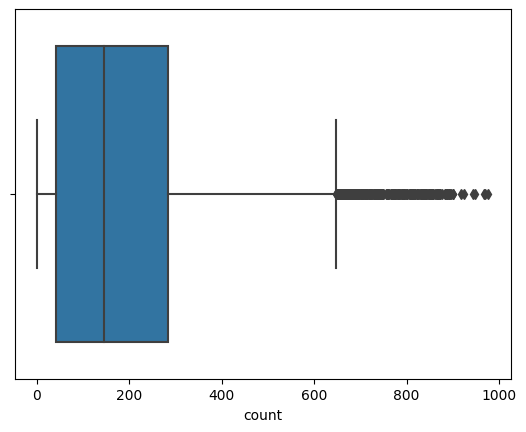

The lower/upper boundary is -351.8342688102495/734.9825326353459
There are 147 outliers based on 3-sigma rule


In [23]:
detect_outliers_3sigma(train['count'])

In [24]:
def delete_outliers(data, df):
    original_shape = df.shape
    mean = np.mean(data)
    std = np.std(data)
    outliers=np.abs(data-mean) > (3*std)
    outliers_num = len(train[outliers])
    df.drop(index=data[outliers].index, inplace=True)
    print("Have already deleted",outliers_num,"outliers")
    print ("Shape Before Delete Ouliers: ",original_shape)
    print ("Shape After Delete Ouliers: ",df.shape)

In [25]:
delete_outliers(train['count'], train)

Have already deleted 147 outliers
Shape Before Delete Ouliers:  (10886, 19)
Shape After Delete Ouliers:  (10739, 19)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


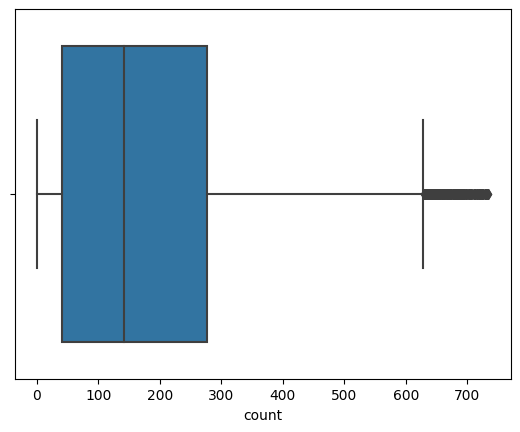

The lower/upper boundary is -317.01718640966425/683.0248221299362
There are 75 outliers based on 3-sigma rule


In [26]:
detect_outliers_3sigma(train['count'])

# Correlation heatmap

In [27]:
def correlation_heatmap(corr):
    mask = np.array(corr)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(20,10)
    sn.heatmap(corr, annot=True, mask=mask)

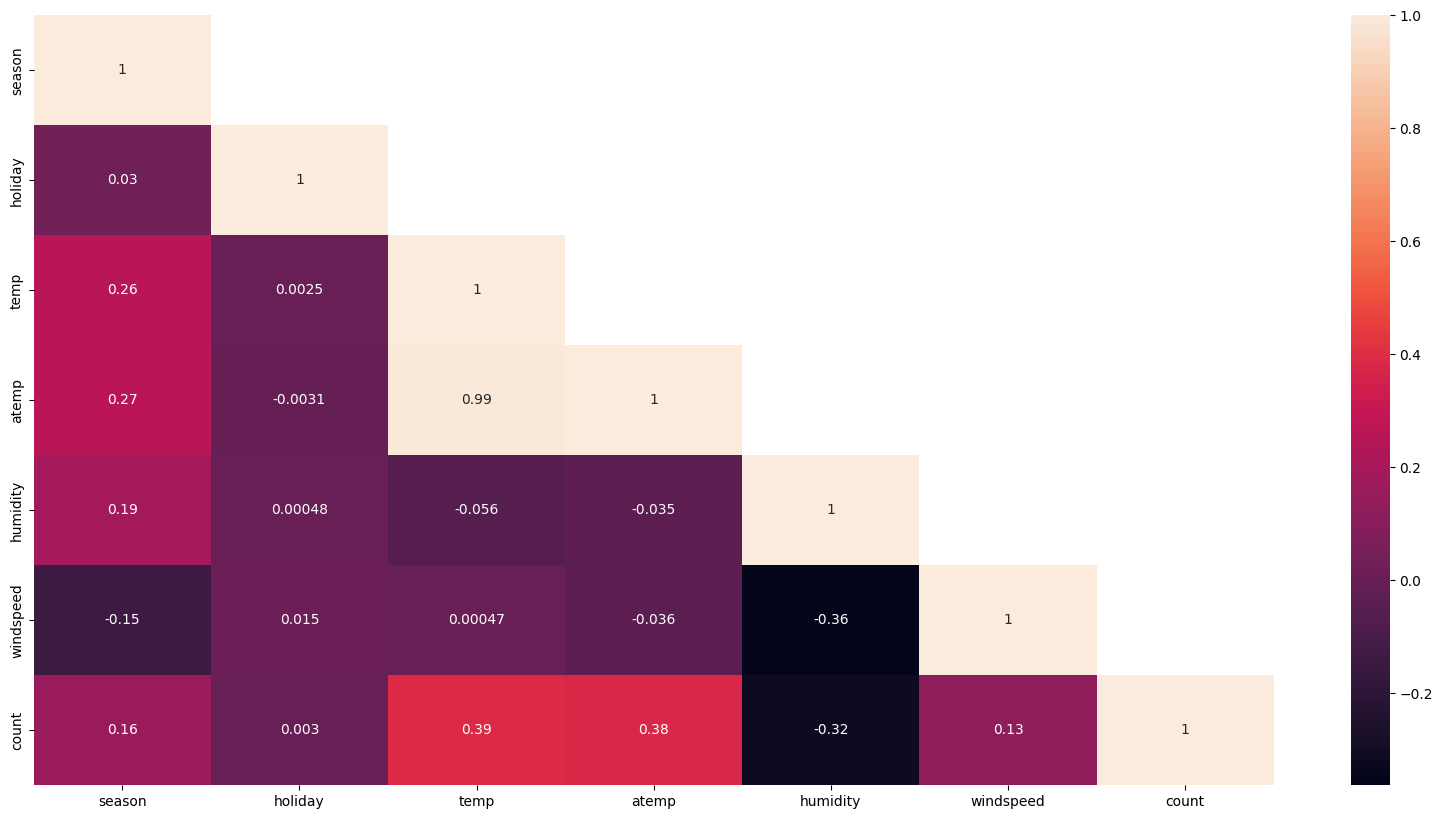

In [28]:
corr = train[['season', 'holiday','temp', 'atemp','humidity', 'windspeed', 'count']].corr()
correlation_heatmap(corr)

# Special Days

In [29]:
def get_day(day_start):
   day_end = day_start + pd.offsets.DateOffset(hours=23)
   return pd.date_range(day_start, day_end, freq="H")

In [30]:
# set datetime as index
dt = pd.DatetimeIndex(train['datetime'])
train.set_index(dt, inplace=True)

dtt = pd.DatetimeIndex(test['datetime'])
test.set_index(dtt, inplace=True)

In [31]:
train.head(3)

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,weekday
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,52,5
2011-01-01 10:00:00,10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,52,5
2011-01-01 11:00:00,11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,52,5


In [32]:
# tax day
train.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
train.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1
# thanksgiving friday
test.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
test.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0
# tax day
train.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
train.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0
# thanksgiving friday
test.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
test.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1

# storms
test.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1
# tornado
train.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1


# Chrismas
test.loc[get_day(pd.datetime(2011, 12, 24)), "workingday"] = 0
test.loc[get_day(pd.datetime(2011, 12, 31)), "workingday"] = 0
test.loc[get_day(pd.datetime(2012, 12, 26)), "workingday"] = 0
test.loc[get_day(pd.datetime(2012, 12, 31)), "workingday"] = 0

test.loc[get_day(pd.datetime(2011, 12, 24)), "holiday"] = 1
test.loc[get_day(pd.datetime(2011, 12, 31)), "holiday"] = 1
test.loc[get_day(pd.datetime(2012, 12, 31)), "holiday"] = 1

<ipython-input-32-b81508c1e82d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  train.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
<ipython-input-32-b81508c1e82d>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  train.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1
<ipython-input-32-b81508c1e82d>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
<ipython-input-32-b81508c1e82d>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0
<ipython-input-32-b8

# Visualization

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Casual Count'),
 Text(0.5, 1.0, 'Box Plot On Casual Count Across Hour Of The Day')]

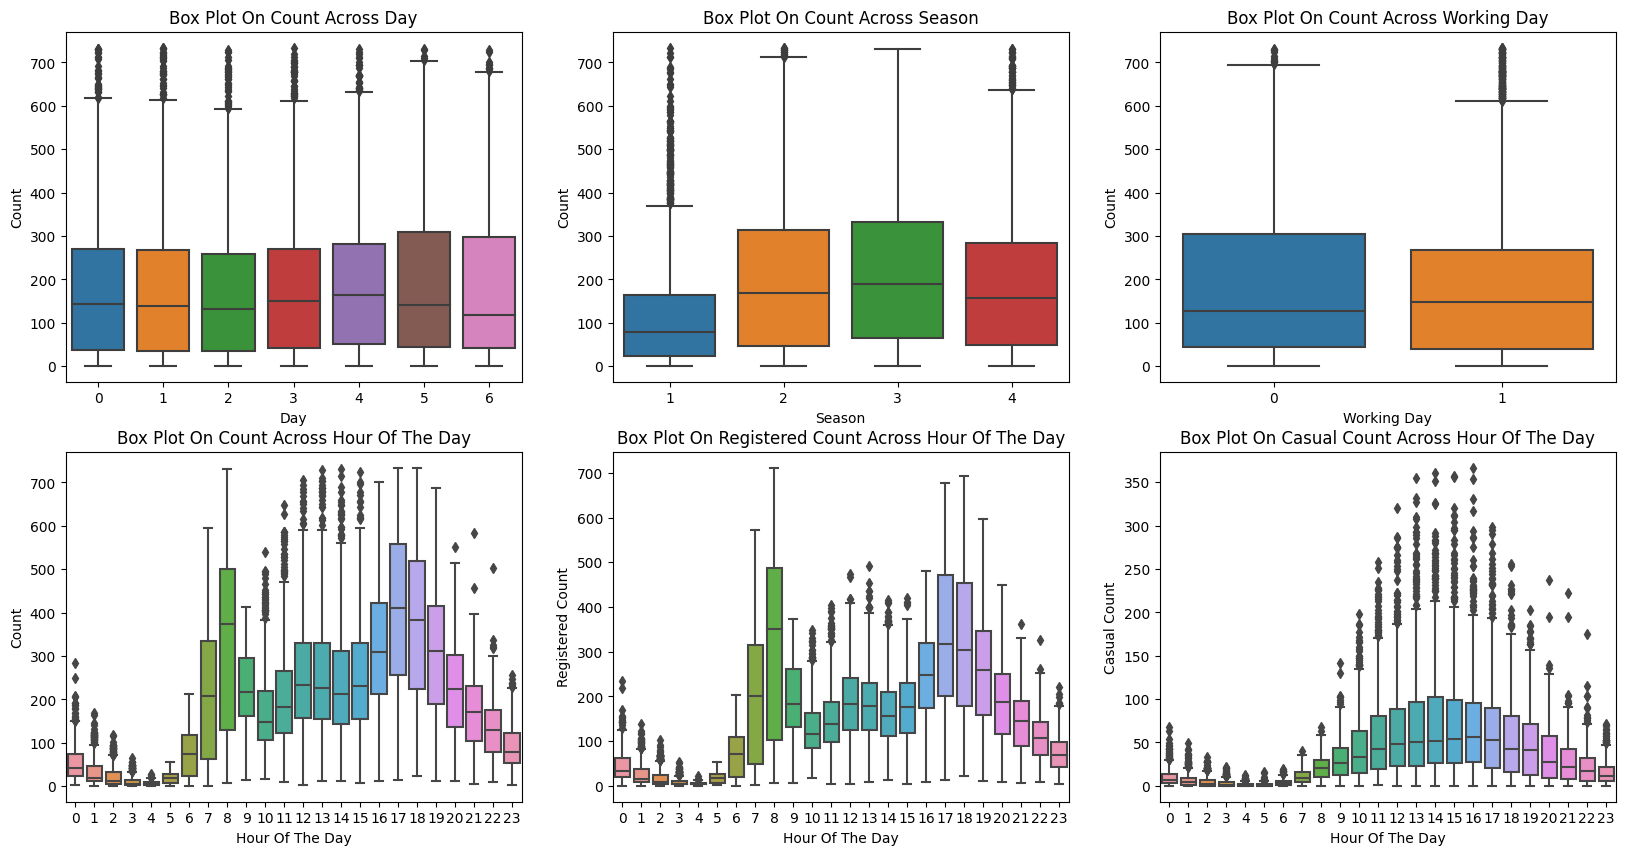

In [33]:
# ref: https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile#About-Dataset
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)

sn.boxplot(data=train,y="count",x='weekday',orient="v",ax=axes[0][0])
sn.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[0][2])
sn.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=train,y="registered",x="hour",orient="v",ax=axes[1][1])
sn.boxplot(data=train,y="casual",x="hour",orient="v",ax=axes[1][2])

axes[0][0].set(xlabel='Day',ylabel='Count',title="Box Plot On Count Across Day")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][2].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Hour Of The Day', ylabel='Registered Count',title="Box Plot On Registered Count Across Hour Of The Day")
axes[1][2].set(xlabel='Hour Of The Day', ylabel='Casual Count',title="Box Plot On Casual Count Across Hour Of The Day")

Text(0.5, 0.98, 'weather count across different seasons')

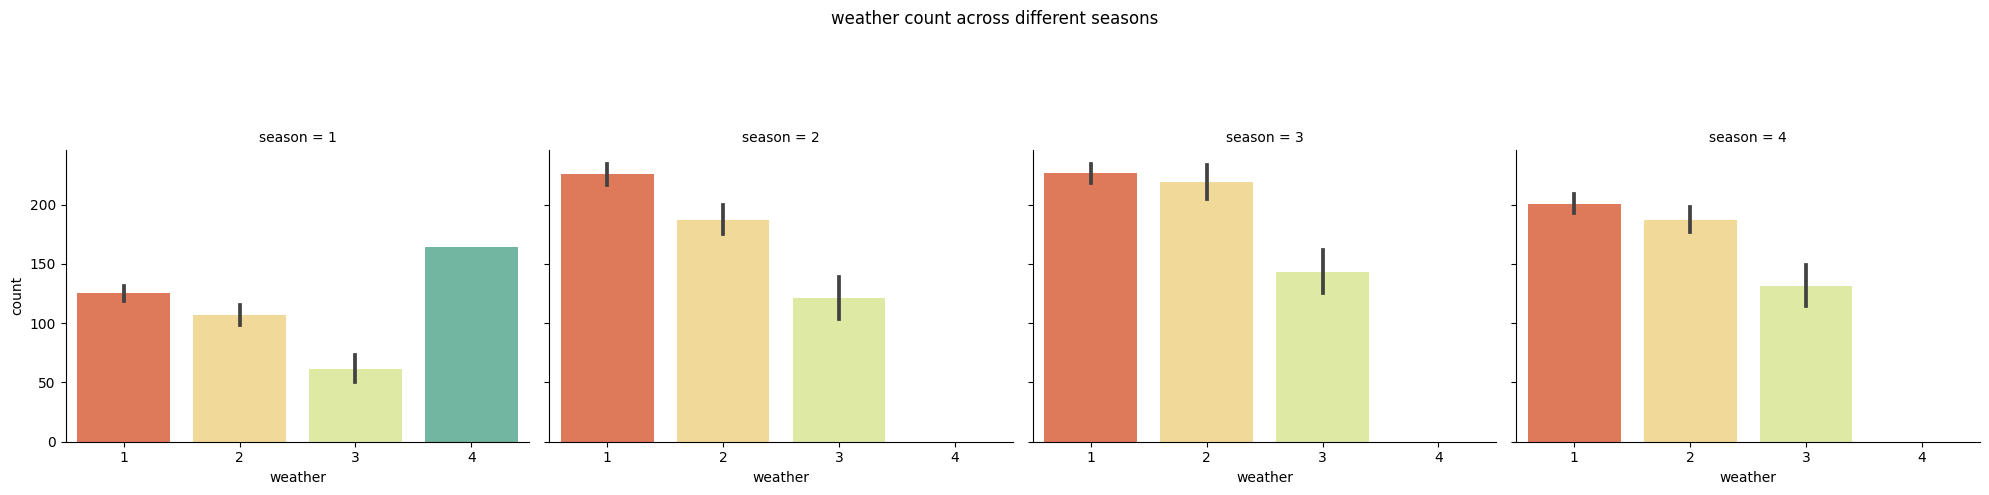

In [34]:
# weather count across different seasons
g = sn.catplot(x='weather',y='count',col='season', kind="bar", palette="Spectral", data=train)
g.fig.subplots_adjust(top=0.7) # adjust the Figure
g.fig.suptitle("weather count across different seasons")

<ipython-input-35-1f77b82df8df>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(x='hour', y='registered', data=train, color='red',label='Registered', marker='o', ax=ax3, ci=None)
<ipython-input-35-1f77b82df8df>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(x='hour', y='casual', data=train, color='blue', label='Casual', marker='o', ax=ax3, ci=None)


Text(0, 0.5, 'Count')

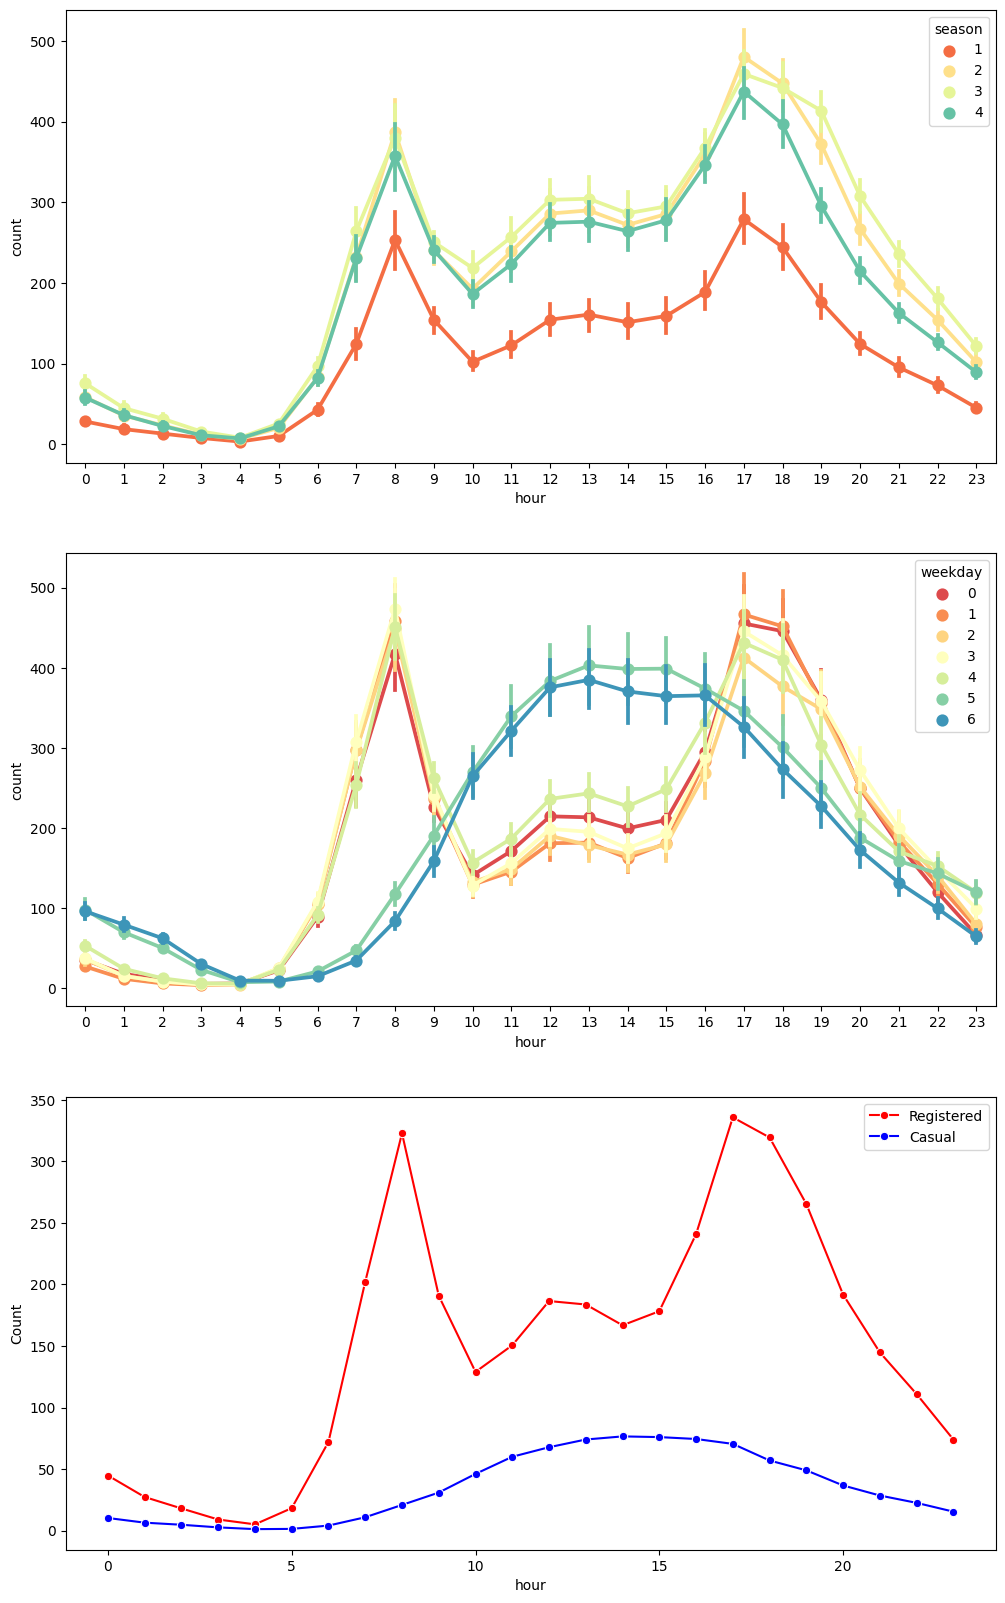

In [35]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,20)
sn.pointplot(x='hour',y='count',hue='season',join=True, data=train, palette="Spectral", ax=ax1)
sn.pointplot(x='hour',y='count',hue='weekday',join=True, data=train, palette="Spectral", ax=ax2)
sn.lineplot(x='hour', y='registered', data=train, color='red',label='Registered', marker='o', ax=ax3, ci=None)
sn.lineplot(x='hour', y='casual', data=train, color='blue', label='Casual', marker='o', ax=ax3, ci=None)
ax3.set_ylabel('Count')

<Axes: ylabel='Density'>

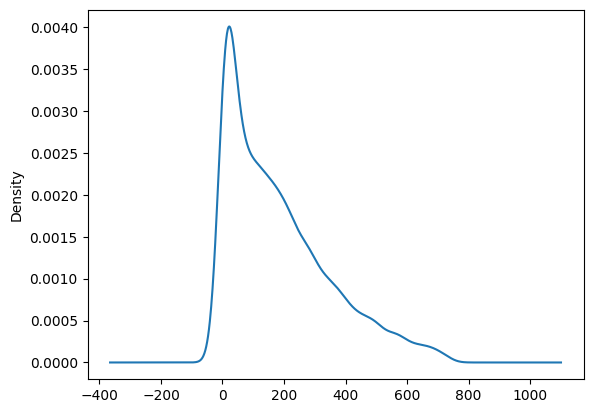

In [36]:
# Kernel Density Estimation plot
train['count'].plot(kind='kde')

<Axes: ylabel='Density'>

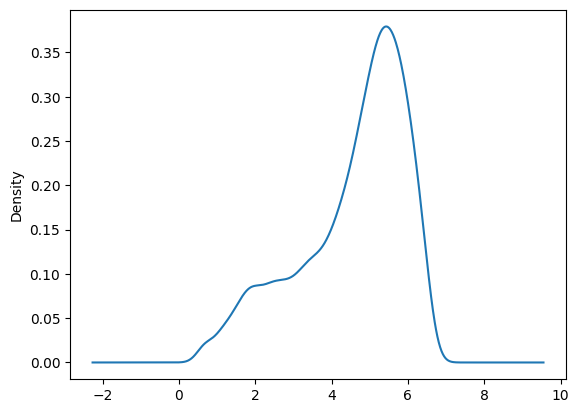

In [37]:
# log trnasformation for skewed count data
import math
train['count_log']=np.log1p(train['count'])
train['count_log'].plot(kind='kde')

# Model

## Metrics

In [38]:
# metrics
def rmsle(y_real, y_pre):
    log1 = np.log1p(y_real)
    log2 = np.log1p(y_pre)
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Split Dataset

In [39]:
drop_columns = ['count', 'count_log', 'casual', 'registered', 'index', 'datetime']
X_train = train.drop(drop_columns, axis = 1).values
X_test = test.drop(['index', 'datetime'], axis = 1).values

yLog = train['count_log'].values
x_date = test['datetime'].values

In [40]:
X_train.shape, X_test.shape

((10739, 14), (6493, 14))

In [41]:
rf_columns = [
    'weather', 'temp', 'windspeed',
    'workingday', 'season', 'holiday',
    'hour', 'weekday', 'week',
]
gb_columns =[
    'weather', 'temp', 'humidity', 'windspeed',
    'workingday', 'season', 'holiday',
    'hour', 'weekday', 'year',
]

In [42]:
rf_x_train=train[rf_columns].values
rf_x_test=test[rf_columns].values

gb_x_train=train[gb_columns].values
gb_x_test=test[gb_columns].values

y_casual = train['casual'].apply(lambda x: np.log1p(x)).values
y_registered = train['registered'].apply(lambda x: np.log1p(x)).values
y = train['count'].apply(lambda x: np.log1p(x)).values

X_date=test['datetime'].values

In [43]:
rf_x_train.shape, rf_x_test.shape

((10739, 9), (6493, 9))

In [44]:
gb_x_train.shape, gb_x_test.shape

((10739, 10), (6493, 10))

In [45]:
# Split training dataset
from sklearn.model_selection import train_test_split

drop_columns = ['count', 'count_log', 'casual', 'registered', 'index', 'datetime']
X_train = train.drop(drop_columns, axis = 1).values
xd_train, xd_test, yd_train, yd_test = train_test_split(X_train, y, random_state=0)

xd_train.shape, xd_test.shape, yd_train.shape, yd_test.shape

((8054, 14), (2685, 14), (8054,), (2685,))

In [47]:
xd_train

array([[3, 0, 1, ..., 19, 28, 2],
       [4, 0, 0, ..., 6, 44, 6],
       [4, 0, 0, ..., 10, 49, 6],
       ...,
       [3, 0, 1, ..., 17, 35, 4],
       [3, 0, 0, ..., 9, 36, 6],
       [3, 0, 0, ..., 1, 28, 5]], dtype=object)

## XGBRegressor

In [48]:
xgb_model = xgb.XGBRegressor()
def XGB_model():
    xgb_parameters = {'random_state': [42],
                  'n_estimators': [300, 370, 400],
                  'max_depth': [4, 5],
                  'learning_rate': [0.1]}
    rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)

    gs = GridSearchCV(estimator = xgb_model, param_grid = xgb_parameters, scoring = rmsle_scorer, cv = 5)
    gs.fit(xd_train, yd_train)
    print('Best params for XGBoost model are: ', gs.best_params_)
    #
    test_pred = gs.predict(xd_test)
    # calculate RMSLE
    score = rmsle(yd_test,test_pred)
    return score

## RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest_model():
    params = {'n_estimators': 1000,
              'max_depth': 15,
              'random_state': 0,
              'min_samples_split' : 2,
              'n_jobs': -1}

    rfr = RandomForestRegressor(**params)
    rfr.fit(xd_train, yd_train)
    test_pred = rfr.predict(xd_test)
    # calculate RMSLE
    score = rmsle(yd_test,test_pred)
    return score

## GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
def GradientBoosting_model():
    gbr = GradientBoostingRegressor(n_estimators = 1000,
                                    max_depth = 5,
                                    random_state = 0)
    gbr.fit(xd_train,yd_train)
    test_pred = gbr.predict(xd_test)
    score = rmsle(yd_test,test_pred)
    return score

In [51]:
print("RMSLE Score for different models")
print("XGBoost:      ",XGB_model())
print("RandomForest: ",RandomForest_model())
print("GradientBoost: ",GradientBoosting_model())

RMSLE Score for different models
Best params for XGBoost model are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'random_state': 42}
XGBoost:       0.07957196959997952
RandomForest:  0.08143885821515123
GradientBoost:  0.08106742308844261


## Model Prediction

In [52]:
# XGBoost
xgb_params = {'random_state': 42,
              'n_estimators': 200,
              'max_depth': 5,
              'learning_rate': 0.1}

XGB1 = xgb.XGBRegressor(**xgb_params)
XGB1.fit(gb_x_train,y_casual)
print("model score for prediting casual count:",XGB1.score(gb_x_train,y_casual))

XGB2 = xgb.XGBRegressor(**xgb_params)
XGB2.fit(gb_x_train,y_registered)
print("model score for prediting registered count:",XGB2.score(gb_x_train,y_registered))

XGB3 = xgb.XGBRegressor(**xgb_params)
XGB3.fit(gb_x_train,y)
print("model score for prediting count:",XGB3.score(gb_x_train,y))

model score for prediting casual count: 0.9226294838216818
model score for prediting registered count: 0.970395797544881
model score for prediting count: 0.9704984642511707


<Figure size 1500x1200 with 0 Axes>

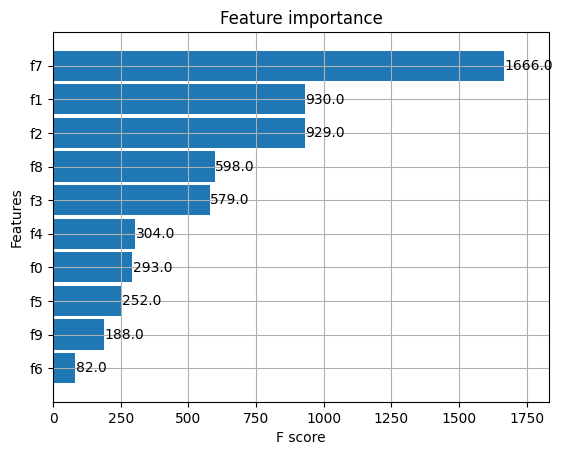

In [53]:
from xgboost import plot_importance, plot_tree
fig = plt.figure(figsize=(15,12))
fig = plot_importance(XGB3, height=0.9,max_num_features = 25)
plt.show()

In [55]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

gbr_params = {'n_estimators': 150,
           'max_depth': 5,
           'random_state': 0,
           'min_samples_leaf' : 10,
           'learning_rate': 0.1,
           'subsample': 0.7,
           'loss': 'squared_error'}

GBR1 = GradientBoostingRegressor(**gbr_params)
GBR1.fit(gb_x_train,y_casual)
print("model score for prediting casual count:",GBR1.score(gb_x_train,y_casual))

GBR2 = GradientBoostingRegressor(**gbr_params)
GBR2.fit(gb_x_train,y_registered)
print("model score for prediting registered count:",GBR2.score(gb_x_train,y_registered))

GBR3 = GradientBoostingRegressor(**gbr_params)
GBR3.fit(gb_x_train,y)
print("model score for prediting count:",GBR3.score(gb_x_train,y))

model score for prediting casual count: 0.9182308992500625
model score for prediting registered count: 0.9681314008539198
model score for prediting count: 0.9681860842764839


In [56]:
def prediction(x_test, models):
    prediction = []
    for model in models:
        pre = model.predict(x_test)
        pre = np.expm1(pre)
        prediction.append(pre)
    return sum(prediction)


In [57]:
pred_xgb = prediction(gb_x_test, models=[XGB1, XGB2])
pred_gbr = prediction(gb_x_test, models=[GBR1, GBR2])

<Axes: ylabel='Count'>

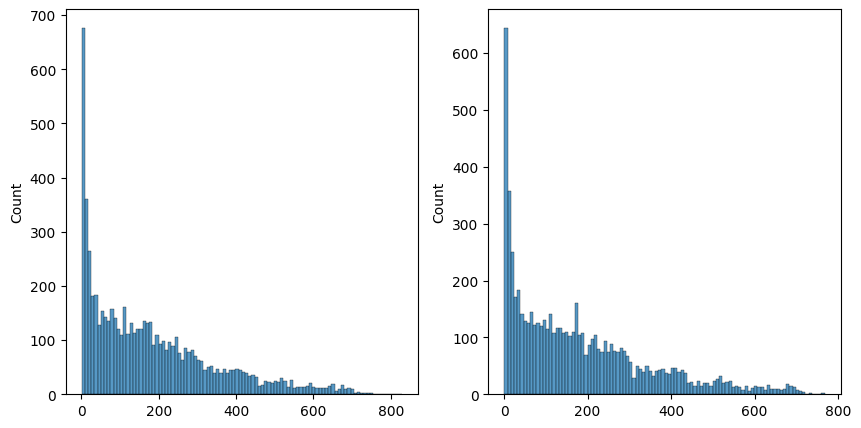

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.histplot(pred_xgb, bins=100, ax=ax1)
sns.histplot(pred_gbr, bins=100, ax=ax2)

In [58]:
prediction = (0.6 * pred_xgb) + (0.4 * pred_gbr)

In [59]:
prediction

array([ 11.39274649,   1.71262934,   1.4968748 , ..., 172.82465429,
        61.11781835, 151.55190794])

<Axes: ylabel='Count'>

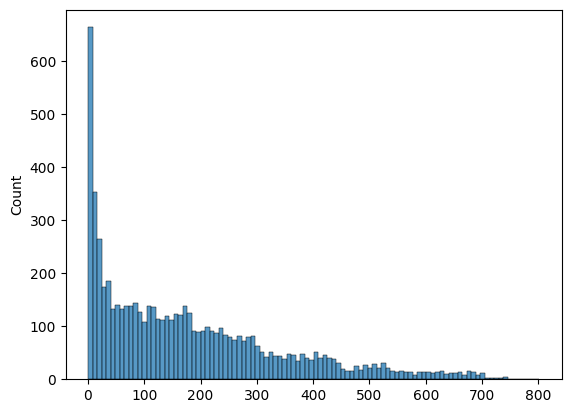

In [65]:
sns.histplot(prediction, bins=100)